In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the dataset
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
#Drop the Unnamed: 0 column
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
#get the nomber of rows and columns
df.shape

(18249, 13)

There are 18249 rows and 14 columns.

In [10]:
#Get the column data types
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Date,type ans region is object type.

In [11]:
#Get the all columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
# Get a count of the empty values for each column
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values.

In [13]:
#Check for nay missing/null values in the data
df.isnull().values.any()

False

In [14]:
#Print all of the data types and their unique value
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' :'+ str(df[column].unique()))
        print(df[column].value_counts())
        print('------------------------')

Date :['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016-07-24'
 '20

In [15]:
le= LabelEncoder()
df= df.apply(LabelEncoder().fit_transform)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0,0,0,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,116,5729,5810,3188,0,6785,6648,2676,0,1,3,53
18245,160,124,5233,4653,4757,0,5955,5864,2340,0,1,3,53
18246,159,140,5203,4654,3928,4712,5985,5961,818,0,1,3,53
18247,158,146,5616,5183,4402,4710,6360,6284,901,0,1,3,53


In [16]:
df.dtypes

Date            int32
AveragePrice    int64
Total Volume    int64
4046            int64
4225            int64
4770            int64
Total Bags      int64
Small Bags      int64
Large Bags      int64
XLarge Bags     int64
type            int32
year            int64
region          int32
dtype: object

Now data types is int for all variables.

Date               AxesSubplot(0.125,0.816017;0.168478x0.0639831)
AveragePrice    AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Total Volume    AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
4046            AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
4225               AxesSubplot(0.125,0.739237;0.168478x0.0639831)
4770            AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
Total Bags      AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
Small Bags      AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
Large Bags         AxesSubplot(0.125,0.662458;0.168478x0.0639831)
XLarge Bags     AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
type            AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
year            AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
region             AxesSubplot(0.125,0.585678;0.168478x0.0639831)
dtype: object

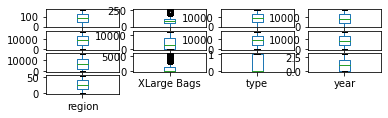

In [17]:
df.plot(kind='box',subplots=True,layout=(10,4))

No outliers are present.

# Consider target is AveragePrice solve by Using Regression 

In [18]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,93.595265,9114.688312,8601.745356,8984.864376,4029.833142,8982.184777,8263.606115,6261.255850,893.316894,0.499918,1.147899,26.495644
std,48.787638,40.253995,5265.433348,5232.888735,5258.854866,3996.027809,5253.461654,5168.860788,4852.398211,1569.392283,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,63.000000,4554.000000,4032.000000,4426.000000,0.000000,4414.000000,3651.000000,1479.000000,0.000000,0.000000,0.000000,13.000000
50%,84.000000,90.000000,9113.000000,8579.000000,8979.000000,2993.000000,8973.000000,8199.000000,5969.000000,0.000000,0.000000,1.000000,26.000000
75%,126.000000,119.000000,13675.000000,13139.000000,13540.000000,7508.000000,13534.000000,12758.000000,10520.000000,1270.000000,1.000000,2.000000,40.000000
max,168.000000,258.000000,18236.000000,17701.000000,18102.000000,12070.000000,18096.000000,17320.000000,15081.000000,5587.000000,1.000000,3.000000,53.000000


The minimum average price is 0 and max is 258.
no outliers are presents.



In [19]:
cor=df.corr()
cor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145533,0.074852,0.000498,-0.004087,-0.065781,0.198822,0.175062,0.172256,0.159309,-0.000060,0.950274,-0.000101
AveragePrice,0.145533,1.000000,-0.589341,-0.570148,-0.490201,-0.513770,-0.581311,-0.525067,-0.498835,-0.339222,0.615982,0.093216,-0.011796
Total Volume,0.074852,-0.589341,1.000000,0.903278,0.940148,0.810884,0.952844,0.928842,0.708302,0.600745,-0.808491,0.085824,0.095988
4046,0.000498,-0.570148,0.903278,1.000000,0.793995,0.741457,0.838443,0.826777,0.647191,0.562309,-0.748193,0.011444,0.184896
4225,-0.004087,-0.490201,0.940148,0.793995,1.000000,0.801623,0.857661,0.838541,0.639056,0.577395,-0.780779,0.006278,0.068547
4770,-0.065781,-0.513770,0.810884,0.741457,0.801623,1.000000,0.757695,0.767877,0.554446,0.624137,-0.748100,-0.055180,0.050078
Total Bags,0.198822,-0.581311,0.952844,0.838443,0.857661,0.757695,1.000000,0.962575,0.758396,0.594852,-0.754928,0.205703,0.098432
Small Bags,0.175062,-0.525067,0.928842,0.826777,0.838541,0.767877,0.962575,1.000000,0.612231,0.590193,-0.757381,0.180780,0.094037
Large Bags,0.172256,-0.498835,0.708302,0.647191,0.639056,0.554446,0.758396,0.612231,1.000000,0.474620,-0.527684,0.180002,0.121728
XLarge Bags,0.159309,-0.339222,0.600745,0.562309,0.577395,0.624137,0.594852,0.590193,0.474620,1.000000,-0.561368,0.160041,0.012659


<AxesSubplot:>

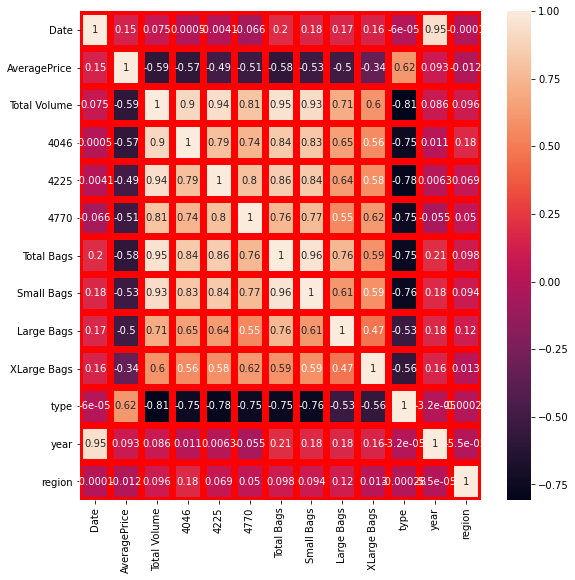

In [20]:
plt.figure(figsize=(9,9))
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

In [21]:
df.skew()

Date            0.000117
AveragePrice    0.577300
Total Volume    0.000753
4046            0.016272
4225            0.003850
4770            0.510735
Total Bags      0.007023
Small Bags      0.048568
Large Bags      0.188522
XLarge Bags     1.610157
type            0.000329
year            0.215339
region          0.000030
dtype: float64

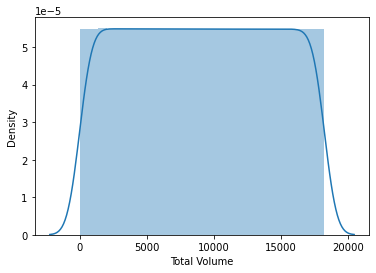

In [22]:
sn.distplot(df['Total Volume'])
plt.show()

Total Volume is between 0 and more then 15000.

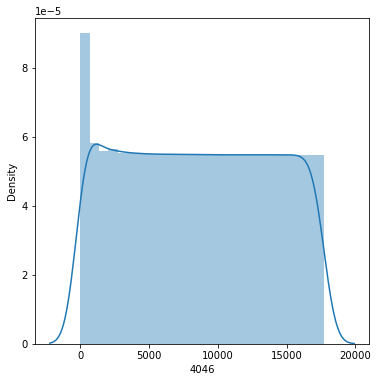

In [23]:
plt.figure(figsize=(6,6))
sn.distplot(df['4046'])
plt.show()

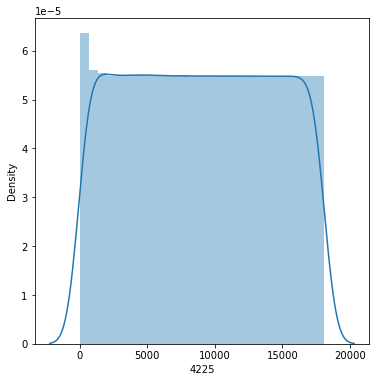

In [24]:
plt.figure(figsize=(6,6))
sn.distplot(df['4225'])
plt.show()

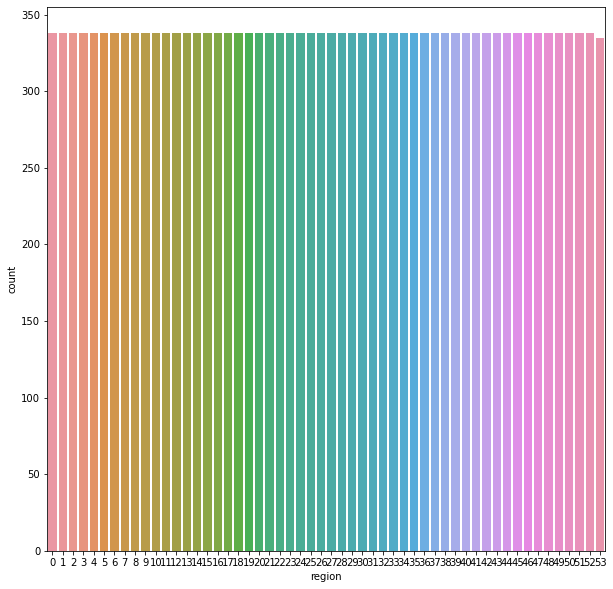

In [25]:
plt.figure(figsize=(10,10))
sn.countplot(x='region',data=df)
plt.show()

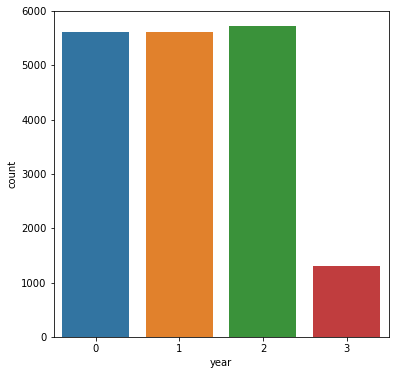

In [26]:
plt.figure(figsize=(6,6))
sn.countplot(x='year',data=df)
plt.show()

In [27]:
x= df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [28]:
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,7931,4383,10872,1400,5780,5782,1264,0,0,0,0
1,50,7645,3616,10213,1570,6013,5972,1288,0,0,0,0
2,49,9388,3891,12864,2516,5616,5625,1328,0,0,0,0
3,48,8374,4545,11751,1789,4727,4880,1513,0,0,0,0
4,47,7540,4201,10157,1836,4874,4985,1855,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,5729,5810,3188,0,6785,6648,2676,0,1,3,53
18245,160,5233,4653,4757,0,5955,5864,2340,0,1,3,53
18246,159,5203,4654,3928,4712,5985,5961,818,0,1,3,53
18247,158,5616,5183,4402,4710,6360,6284,901,0,1,3,53


In [29]:
y

0         86
1         88
2         46
3         61
4         81
        ... 
18244    116
18245    124
18246    140
18247    146
18248    115
Name: AveragePrice, Length: 18249, dtype: int64

In [30]:
#spliting data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(18249, 12) (14599, 12) (3650, 12)


In [32]:
lm= LinearRegression()

In [33]:
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
lm.coef_

array([ 5.18529225e-01, -6.05485123e-03,  6.75176826e-04,  5.87450022e-03,
       -5.25328047e-04, -6.47554346e-03,  5.10215367e-03, -2.40829835e-04,
        7.32235488e-04,  3.68009548e+01, -1.66262298e+01,  4.77953866e-02])

In [35]:
lm.intercept_

64.92324520957393

In [36]:
pred=lm.predict(x_test)

In [37]:
lm.score(x_train,y_train)

0.5564002865899143

# Regularization

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [40]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

728.3582738114471


In [41]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.5552177652533021

# Ensemble Technique

In [42]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state =0, max_depth =5)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [43]:
dt.score(x_train,y_train)

0.6182156868944975

In [44]:
predictions = dt.predict(x_test)

In [45]:
dtscore = cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

Cross Val Score: 16.2949575416761


# Hyper Parameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_features':['auto','sqrt','log2']}

In [48]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [49]:
GCV

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

The best model is Decision Tree.

In [50]:
import pickle
filename ='Avocado.pkl'
pickle.dump(dtc,open(filename,'wb'))

In [51]:
loaded_model = pickle.load(open('Avocado.pkl','rb'))

# Consider target is region solve by Using classification

In [52]:
x = df.drop(['region'],axis=1)
y = df['region']

In [53]:
x.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0,0,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0,0,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0,0,0


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [55]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [56]:
x_train.shape

(13686, 12)

In [57]:
x_test.shape

(4563, 12)

In [58]:
y_train.shape

(13686,)

In [59]:
y_test.shape

(4563,)

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [67]:
pred=lg.predict(x_test)
print(pred)

[20  1 27 ... 44 29 20]


In [68]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.2664913434144203


In [69]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.15077799693184307
[[ 5  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 22 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0 12  0 ... 15  0  0]
 [ 2  1  1 ...  2  1  1]]
              precision    recall  f1-score   support

           0       0.06      0.07      0.06        76
           1       0.12      0.29      0.18        85
           2       0.19      0.28      0.22        80
           3       0.27      0.15      0.19        88
           4       0.06      0.02      0.03        83
           5       0.09      0.19      0.12        94
           6       0.00      0.00      0.00        82
           7       0.36      0.56      0.44        94
           8       0.28      0.12      0.17        90
           9       0.31      0.55      0.40        88
          10       0.20      0.03      0.04        79
          11       0.14      0.01      0.02        85
          12       0.13      0.30      0.18        83
          13       0.05      0.22      0.08        81
          14 

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8021038790269559
[[65  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  2]
 [ 0  0 70 ...  0  0  0]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  0  1 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        76
           1       0.67      0.72      0.69        85
           2       0.86      0.88      0.87        80
           3       0.79      0.88      0.83        88
           4       0.79      0.90      0.84        83
           5       0.83      0.81      0.82        94
           6       0.94      0.98      0.96        82
           7       0.83      0.82      0.82        94
           8       0.97      0.96      0.96        90
           9       0.77      0.83      0.80        88
          10       0.71      0.61      0.65        79
          11       0.82      0.88      0.85        85
          12       0.80      0.80      0.80        83
          13       0.72      0.72      0.72        81
          14  

best model is DecisionTree

In [73]:
import pickle
with open('Avocado_pickle','wb') as f:
    pickle.dump(dtc,f)

In [74]:
with open('Avocado_pickle','rb') as f:
    mp = pickle.load(f)

In [75]:
loaded_model = pickle.load(open('Avocado_pickle','rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8021038790269559
